In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Calibrate Camera

In [27]:
import glob

In [28]:
# filenames of images for camera calibration
images = glob.glob('camera_cal/calibration*.jpg')

In [29]:
# number of internal corners along x, y axis
nx, ny = 9, 6

In [30]:
# prepare object points like (0,0,0), (1,0,0), ... , (x,y,z=0)
objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

In [31]:
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane


for fname in images:
    
    img = mpimg.imread(fname)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     print(f'gray.shape={gray.shape}')
    
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
            
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        
        plt.imsave('camera_cal_output/corners_' + fname.split("/")[-1], img)

In [34]:
ret, mtx, dist, rvecs, = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)

# Undistort an example image

In [41]:
img = mpimg.imread('test_images/test1.jpg')

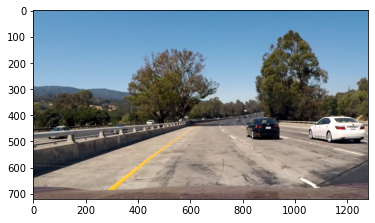

In [42]:
plt.imshow(img)

In [43]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

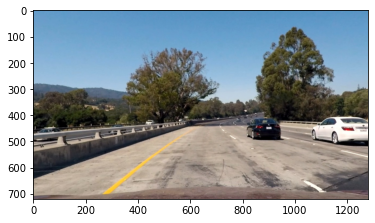

In [44]:
plt.imshow(dst)

# Perspective transform